In [2]:
%matplotlib inline

In [35]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [4]:
ρ = 5
n = 5e1
δ = 2e-1
c = 3e-1
k = 1e-4
m = 1e-1
α0 = 2e-1
κ = 2e-3
λE = 4e-2
λ = 1e-3
e = 9
ϵS = 0
f = 1
rS = 4e2
rL = 4e-2
tH = 2
tD = 1.5
Estar = 10
Vstar = 1e-2

In [5]:
def m1(y, t):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [
        n*δ*y[2] - c*y[0] - f*k*y[3]*y[0],
        (1-ϵS)*(λE*(1 - y[1]/e))*y[1] + ρ*y[0],
        k*y[3]*y[0] - δ*y[2] - (1 - ϵS)*m*y[1]*y[2] + α0*y[4] - κ*y[2],
        λ*(1-y[3]/rS)*y[3] - k*y[3]*y[0],
        λ*(1-y[4]/rL)*y[4] - α0*y[4] + κ*y[4]
    ]        

In [6]:
y0 = [1e-4, 0, 0, 4e2, 0]
ts = np.linspace(0, 350, 700)

In [7]:
ϵS = 0
ys0 = odeint(m1, y0, ts)
ϵS = 0.4
ys1 = odeint(m1, y0, ts)
ϵS = 0.7
ys2 = odeint(m1, y0, ts)

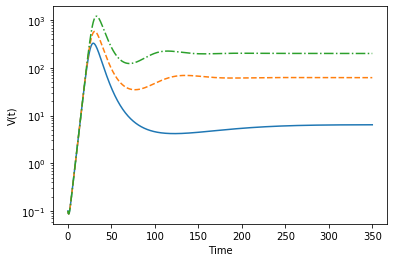

In [8]:
plt.semilogy(ts, 1e3*ys0[:, 0], '-', ts, 1e3*ys1[:, 0], '--', ts, 1e3*ys2[:, 0], '-.')
plt.xlabel('Time')
plt.ylabel('V(t)')
pass

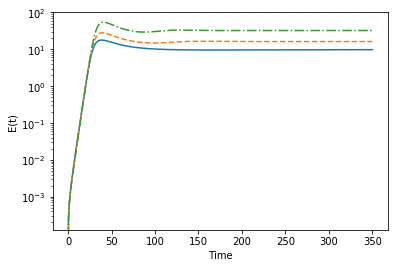

In [9]:
plt.semilogy(ts, ys0[:, 1], '-', ts, ys1[:, 1], '--', ts, ys2[:, 1], '-.')
plt.xlabel('Time')
plt.ylabel('E(t)')
pass